# Representation learning

En este notebook exploramos cómo los modelos de representation learning, como las redes neuronales, pueden aprender automáticamente transformaciones de los datos que facilitan la separación de clases no lineales.

Usaremos un ejemplo simple de clases concéntricas para ilustrar la diferencia entre:

1.	Feature engineering manual, donde transformamos las features originales ($X_1$, $X_2$) a un espacio cuadrático ($X_1^2$, $X_2^2$) para linealizar el problema.
2.	Representation learning, donde un MLP aprende de forma automática una representación interna que permite separar las clases sin necesidad de ingeniería manual.

El objetivo es visualizar cómo un modelo puede “curvar” el espacio de características y agrupar mejor los datos, mostrando la potencia del aprendizaje de representaciones frente al feature engineering tradicional.

In [94]:
from sklearn.datasets import make_circles

In [96]:
import numpy as np

In [97]:
import matplotlib.pyplot as plt

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

## 1.  Generar y visualizar datos concéntricos.

In [100]:
X, y = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)

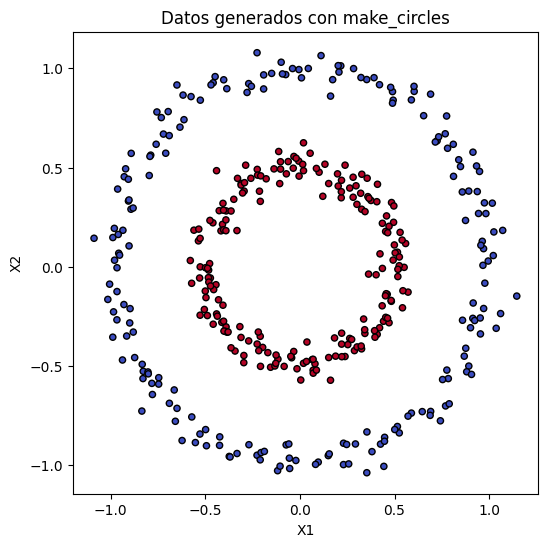

In [93]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Datos generados con make_circles")
plt.show()

## 2.a Perceptrón con features originales

Aquí usas un perceptrón lineal directamente sobre las features $X_1 y X_2$.
- Como el perceptrón es un clasificador lineal, solo puede trazar fronteras lineales.
- Si las clases tienen una estructura no lineal (por ejemplo círculos concéntricos, XOR, etc.), el perceptrón no puede separarlas correctamente.
- Esto muestra claramente la limitación de los modelos lineales cuando el espacio de features no refleja la complejidad del problema.

### (Opción 1) Entrenar un perceptrón (logistic regression) con features originales $x_1, x_2$.

In [101]:
clf_linear = LogisticRegression().fit(X, y)

### (Opción 2) Perceptrón una sola capa con features originales $x_1, x_2$.


In [90]:
clf_quad = Perceptron(max_iter=1000, random_state=42).fit(X, y)

## 2.b MLP con features originales (x1, x2)

- Aquí usas un modelo no lineal (MLP, multilayer perceptron) directamente sobre las features originales.
- Gracias a su capacidad de representation learning, el MLP aprende internamente una transformación de features que hace que las clases sean separables.
- La gran idea: no necesitas ingeniería de features manual; la red aprende la representación adecuada para separar las clases.
- Esto es exactamente lo que hace que el representation learning sea poderoso: transforma los datos automáticamente para que un clasificador simple pueda operar en el nuevo espacio.

In [102]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),   # 1 capa oculta con 10 neuronas
                    activation='relu',          # función de activación
                    solver='adam',
                    max_iter=2000,
                    random_state=42)

In [103]:
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)

## 3.  Transformar a features cuadráticas $x_1^2, x_2^2$.

In [104]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [105]:
X_poly = poly.fit_transform(X)  # [x1, x2, x1^2, x1*x2, x2^2]
# Nos quedamos solo con las cuadráticas puras: x1^2 y x2^2
X_quad = X_poly[:, [2, 4]]

## 4.a Perceptrón con features cuadráticas

- Aquí hacemos feature engineering manual, agregando $X_1^2$ y $X_2^2$.
- Imagina los datos como puntos sobre una hoja de papel plana (espacio 2D original). En ese espacio, las clases no se separan linealmente.
- Al transformar los datos con $X_1^2$ y $X_2^2$, es como si dobláramos y curvaramos la hoja, proyectando los puntos a un nuevo espacio cuadrático.
- En este espacio curvado, los puntos de cada clase se agrupan mejor, reduciendo la dispersión y aumentando la densidad local de cada clase.
- Como resultado, un clasificador lineal ahora puede trazar una frontera que separa las clases, aunque originalmente fueran no lineales.
- Este ejemplo muestra cómo un buen feature engineering puede “linealizar” problemas complejos, haciendo explícita la relación no lineal entre las variables.

### 4.a (Opcion 1) Entrenar un perceptrón (logistic regression) con features cuadráticas ($x1^2, x2^2$)

In [106]:
clf_quad = LogisticRegression().fit(X_quad, y)

### 4.a (Opción 2) Perceptrón una sola capa  con features cuadráticas ($x1^2, x2^2$)


In [81]:
clf_quad = Perceptron(max_iter=1000, random_state=42).fit(X_quad, y)

## 5. Visualización

**Gráfico izquierda (Caso 1: Perceptrón lineal)**
- El perceptrón lineal intenta separar las clases con una recta en el espacio original ($X_1$, $X_2$).
- Para estructuras no lineales como círculos concéntricos, esto es imposible, por lo que la frontera falla en capturar la separación real.

**Gráfico central (Caso 2: Perceptrón con features cuadráticas)**
- Al transformar las features a ($X_1^2$, $X_2^2$), es como si dobláramos el espacio 2D original.
- Las clases ahora se agrupan más y la dispersión se reduce, haciendo que un clasificador lineal pueda separar casi perfectamente.
- Este es un ejemplo de feature engineering manual que logra linealizar un problema no lineal.

**Gráfico derecha (Caso 3: MLP con features originales)**
- La red neuronal aprende automáticamente una representación interna que curva el espacio de manera similar al feature engineering manual.
- Esto permite que el MLP traza una frontera no lineal que separa correctamente las clases, sin necesidad de transformar las features a mano.
- Visualmente, muestra cómo el representation learning reemplaza el feature engineering manual, aprendiendo la transformación que hace que el problema sea linealizable para la capa de salida.

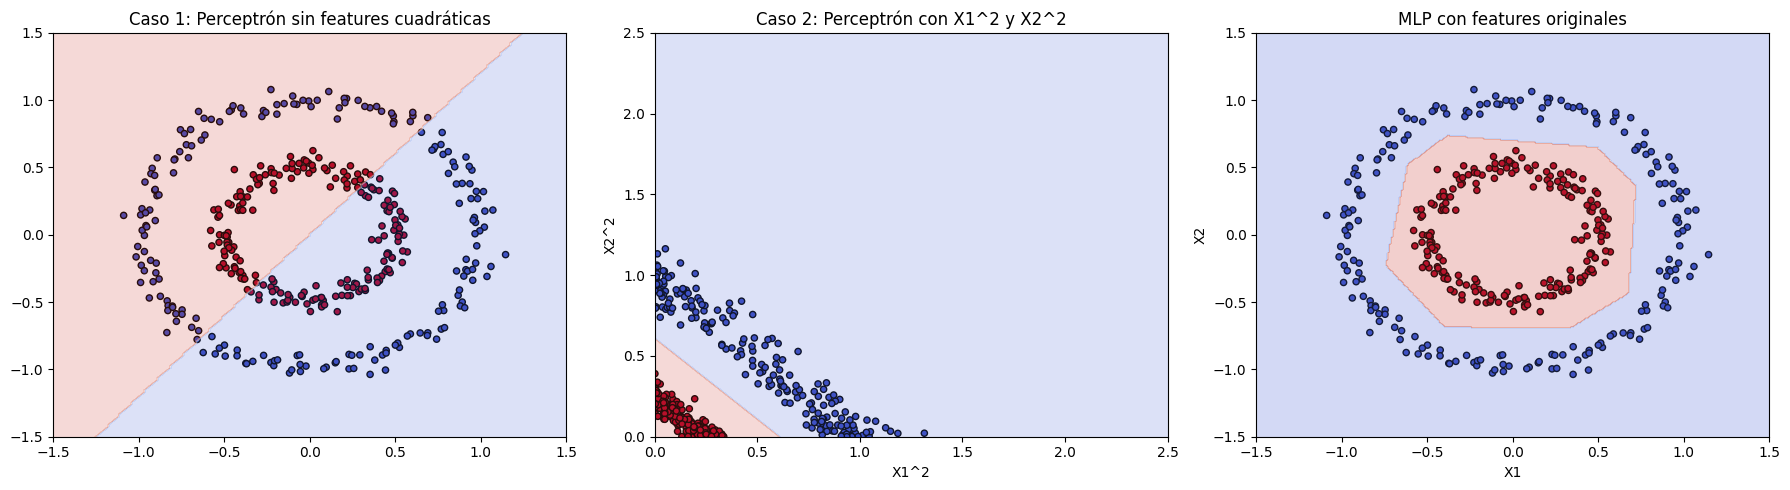

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 gráficos lado a lado

# ---- Caso 1: Perceptrón sin features cuadráticas ----
ax = axes[0]
ax.set_title("Caso 1: Perceptrón sin features cuadráticas")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

# grid para frontera
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
                     np.linspace(-1.5, 1.5, 200))
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

# ---- Caso 2: Perceptrón con X1^2 y X2^2 ----
ax = axes[1]
ax.set_title("Caso 2: Perceptrón con X1^2 y X2^2")
ax.scatter(X_quad[:, 0], X_quad[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

# grid para frontera en el espacio cuadrático
xx, yy = np.meshgrid(np.linspace(0, 2.5, 200),
                     np.linspace(0, 2.5, 200))
Z = clf_quad.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

ax.set_xlabel("X1^2")
ax.set_ylabel("X2^2")

# ---- Caso 3: MLP con features originales ----
ax = axes[2]
ax.set_title("MLP con features originales")
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

# grid para frontera
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 300),
                     np.linspace(-1.5, 1.5, 300))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.coolwarm)

ax.set_xlabel("X1")
ax.set_ylabel("X2")

plt.tight_layout()
plt.show()

---


El presente notebook fue elaborado con la asistencia de ChatGPT (Oct 3 version).

Referencia
OpenAI. (2025). ChatGPT (Oct 3 version) [Large language model]. https://chat.openai.com/